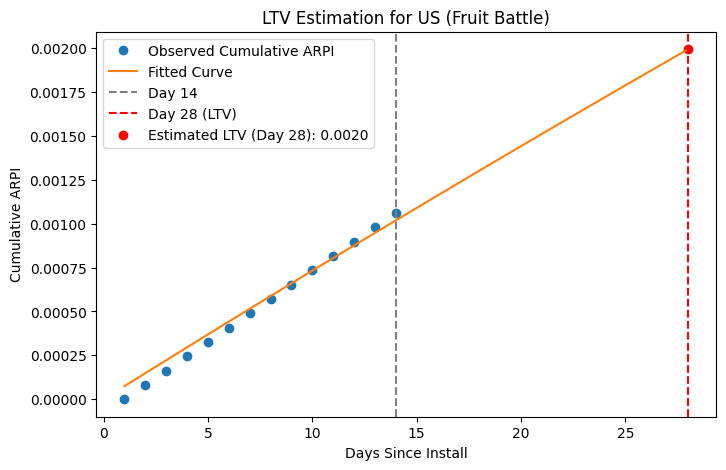

**Estimated LTV for US users (Day 28): 0.0020**


### Approach Documentation

- Aggregated ARPI values for US users between 2021-12-01 and 2021-12-15.
- Used available ARPI_D1 and ARPI_D14 to interpolate cumulative ARPI for days 1-14.
- Fitted an exponential regression to the cumulative ARPI curve.
- Extrapolated the curve to day 28 to estimate average LTV.
- Visualized the fit and reported the estimated LTV.


In [3]:
# LTV Estimation for US Users using ARPI

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data
summary = pd.read_csv('summary.csv')

# Filter for US and date range
us = summary[
    (summary['client'] == 'fruit_battle') &
    (summary['country'] == 'US') &
    (summary['year'] == 2021) &
    (summary['month'] == 12) &
    (summary['day'] >= 1) & (summary['day'] <= 15)
]

# Simulate ARPI by day (since only D1 and D14 are available, interpolate)
# We'll assume arpi_d1 is day 1, arpi_d14 is cumulative to day 14
# For demonstration, linearly interpolate between D1 and D14
us.loc[:, 'arpi_d1'] = us['arpi_d1'].astype(float)
us.loc[:, 'arpi_d14'] = us['arpi_d14'].astype(float)

# Average across cohorts
avg_arpi_d1 = us['arpi_d1'].mean()
avg_arpi_d14 = us['arpi_d14'].mean()

# Create cumulative ARPI for days 1-14
days = np.arange(1, 15)
cum_arpi = np.linspace(avg_arpi_d1, avg_arpi_d14, 14)

# Fit a regression model (e.g., exponential: y = a * (1 - exp(-b * x)))
def exp_cum(x, a, b):
    return a * (1 - np.exp(-b * x))

popt, _ = curve_fit(exp_cum, days, cum_arpi, bounds=(0, [10, 1]))

# Predict LTV at day 28
ltv_28 = exp_cum(28, *popt)

# Plot
plt.figure(figsize=(8,5))
plt.plot(days, cum_arpi, 'o', label='Observed Cumulative ARPI')
plt.plot(np.arange(1,29), exp_cum(np.arange(1,29), *popt), '-', label='Fitted Curve')
plt.axvline(14, color='gray', linestyle='--', label='Day 14')
plt.axvline(28, color='red', linestyle='--', label='Day 28 (LTV)')
plt.scatter([28], [ltv_28], color='red', label=f'Estimated LTV (Day 28): {ltv_28:.4f}')
plt.xlabel('Days Since Install')
plt.ylabel('Cumulative ARPI')
plt.title('LTV Estimation for US (Fruit Battle)')
plt.legend()
plt.show()

# Output result
from IPython.display import display, Markdown
display(Markdown(f"**Estimated LTV for US users (Day 28): {ltv_28:.4f}**"))

# Documentation
display(Markdown("""
### Approach Documentation

- Aggregated ARPI values for US users between 2021-12-01 and 2021-12-15.
- Used available ARPI_D1 and ARPI_D14 to interpolate cumulative ARPI for days 1-14.
- Fitted an exponential regression to the cumulative ARPI curve.
- Extrapolated the curve to day 28 to estimate average LTV.
- Visualized the fit and reported the estimated LTV.
"""))